In [1]:
#imports
import testdata.TestDataGenerator as tdg
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
#definitions

DIMENSIONS=2
SENSORS= 4

COORDINATE_SYSTEM = 1

INPUT_NODES = SENSORS
HIDDEN_NODES = [64,64]
OUTPUT_NODES = DIMENSIONS

In [3]:
#Generate train data

distances, datapoints, sensors = tdg.generateStatic4PointIO(100,2,COORDINATE_SYSTEM)

In [4]:
#Generate Model

inp = keras.layers.Input((SENSORS,))

x = keras.layers.Dense(64, activation='relu')(inp)
x = keras.layers.Dense(64, activation='relu')(x)
xOut = keras.layers.Dense(1, activation='relu', name='xOut')(x)
yOut = keras.layers.Dense(1, activation='relu', name='yOut')(x)
model = keras.models.Model(inputs=inp, outputs=[xOut, yOut])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 0.5246 - xOut_loss: 0.2876 - yOut_loss: 0.2370 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 2/25
100/100 [==============================] - 0s 132us/step - loss: 0.3688 - xOut_loss: 0.2370 - yOut_loss: 0.1318 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 3/25
100/100 [==============================] - 0s 106us/step - loss: 0.2271 - xOut_loss: 0.1494 - yOut_loss: 0.0777 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 4/25
100/100 [==============================] - 0s 113us/step - loss: 0.1589 - xOut_loss: 0.0962 - yOut_loss: 0.0627 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 5/25
100/100 [==============================] - 0s 82us/step - loss: 0.1406 - xOut_loss: 0.0865 - yOut_loss: 0.0540 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 6/25
100/100 [==============================] - 0s 112us/step - loss: 0.1286 - xOut_loss: 0.0869 - yOut_loss: 0.0417 - xOut_acc: 0.0000e+00 - yOut_acc: 

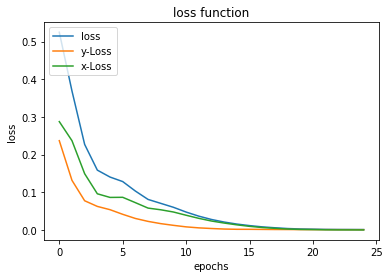

In [5]:
hist = model.fit(distances,datapoints,epochs =25)
plt.title('loss function')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['yOut_loss'])
plt.plot(hist.history['xOut_loss'])
plt.legend(['loss', 'y-Loss', 'x-Loss'], loc='upper left')

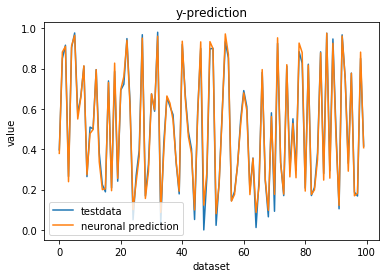

In [6]:
result = model.predict(distances)

plt.ylabel('value')
plt.xlabel('dataset')
plt.title('y-prediction')
plt.plot(datapoints[1])   
plt.plot(result[1])
plt.legend(['testdata', 'neuronal prediction'])

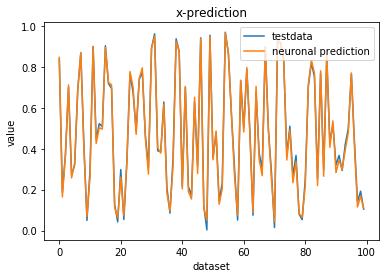

In [7]:
plt.title('x-prediction')
plt.ylabel('value')
plt.xlabel('dataset')
plt.plot(datapoints[0])   
plt.plot(result[0])
plt.legend(['testdata', 'neuronal prediction'])

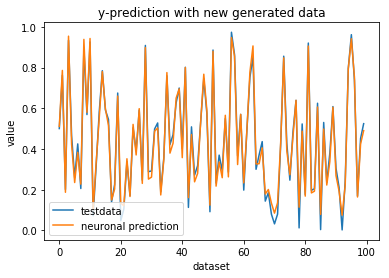

In [17]:
test_distance, test_datapoint, test_sensor = tdg.generateStatic4PointIO(100,2,COORDINATE_SYSTEM)   

testResult = model.predict(test_distance)

plt.ylabel('value')
plt.xlabel('dataset')
plt.title('y-prediction with new generated data')
plt.plot(test_datapoint[1])   
plt.plot(testResult[1])
plt.legend(['testdata', 'neuronal prediction'])

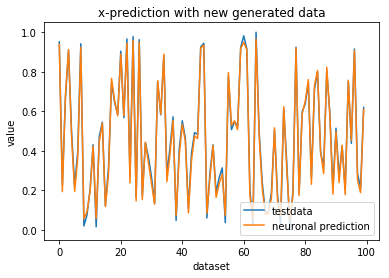

In [18]:
plt.title('x-prediction with new generated data')
plt.ylabel('value')
plt.xlabel('dataset')
plt.plot(test_datapoint[0])   
plt.plot(testResult[0])
plt.legend(['testdata', 'neuronal prediction'])

In [19]:
evaluation = model.evaluate(distances,test_datapoint)
 
print(evaluation[0])

100/100 [==============================] - 0s 898us/step
0.3329604160785675


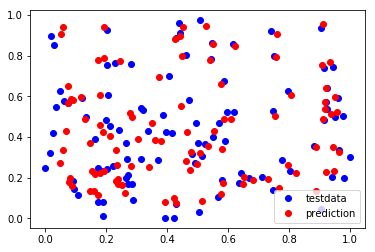

In [20]:
plt.plot(test_datapoint[0], test_datapoint[1], 'bo')
plt.plot(testResult[0], testResult[1], 'ro')
plt.legend(['testdata', 'prediction'])

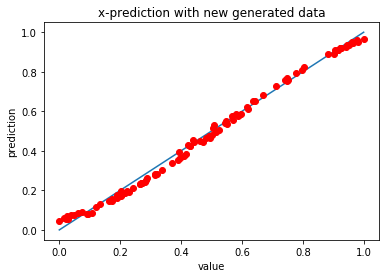

In [21]:
plt.title('x-prediction with new generated data')
plt.ylabel('prediction')
plt.xlabel('value')
plt.plot([0,1])
plt.plot(test_datapoint[0], testResult[0], 'ro')

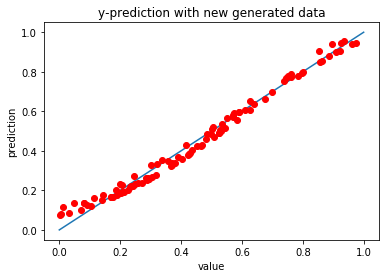

In [22]:
plt.title('y-prediction with new generated data')
plt.ylabel('prediction')
plt.xlabel('value')
plt.plot([0,1])
plt.plot(test_datapoint[1], testResult[1], 'ro')